#House Prices - Advanced Regression Techniques

![image](https://drive.google.com/uc?export=view&id=1zybTU9sRN95HwT2Qjw5UmtQMkrZIfkcs)

### **Final Project** - 207 Applied Machine Learning - Spring 2022
### **Students** : Ameri, Kuruvilla and Scopeta


In [27]:
# import basic packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error

#check the files available in the data directory
from subprocess import check_output



%matplotlib inline

## Data Wrangling

#### Load train and test data

In [2]:
raw_train_data=pd.read_csv('https://raw.githubusercontent.com/scopeta/house_prices_regression/master/data/train.csv')
raw_test_data=pd.read_csv('https://raw.githubusercontent.com/scopeta/house_prices_regression/master/data/test.csv')

In [3]:
# print train data examples
raw_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(raw_train_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [5]:
# print test data examples
raw_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
raw_train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [36]:
#tk check all the columns 
raw_train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#checking for null or missing values in raw training data
column_with_nan = raw_train_data.columns[raw_train_data.isnull().any()]
print(raw_train_data.shape)
for column in column_with_nan:
  print(column, raw_train_data[column].isnull().sum())

(1460, 81)
LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [8]:
#checking for null or missing values in raw test data
column_with_nan_test = raw_test_data.columns[raw_test_data.isnull().any()]
print(raw_test_data.shape)
for column in column_with_nan_test:
  print(column, raw_test_data[column].isnull().sum())

(1459, 80)
MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


In [9]:
# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle_train = np.random.permutation(raw_train_data.index)
shuffle_test = np.random.permutation(raw_test_data.index)
all_train_data, test_data = raw_train_data.iloc[shuffle_train], raw_test_data.iloc[shuffle_test]



#### Check dimension for train and test datasets

In [10]:
print('Train dataset: ', all_train_data.shape)
print('Test_dataset: ', test_data.shape)

Train dataset:  (1460, 81)
Test_dataset:  (1459, 80)


## Exploratory Data Analysis

#### Check how the features correlate with the target variable sales prince

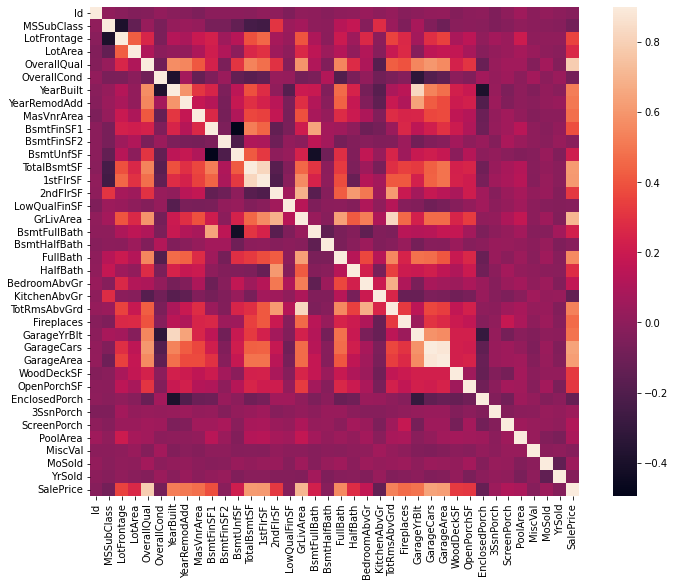

In [11]:
corrmat = all_train_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

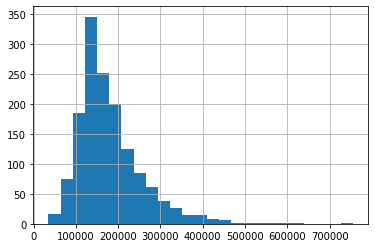

In [12]:
# check out just the home prices
all_train_data['SalePrice'].hist(bins=25)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


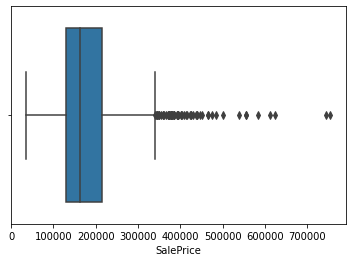

In [13]:
sns.boxplot(all_train_data['SalePrice'])

In [14]:
#Finding the correlation between feature and target 

corrmat_list = corrmat['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corrmat_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

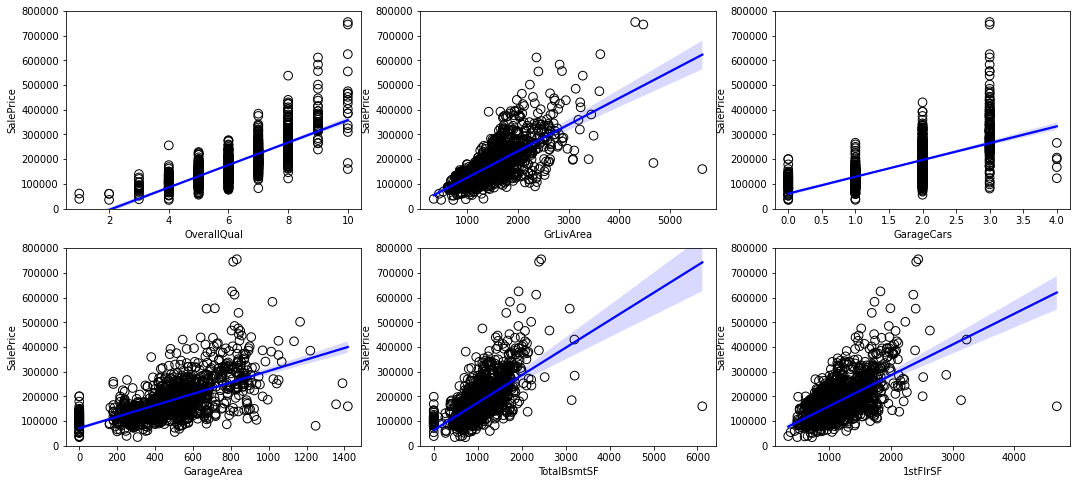

In [15]:
#tk Plot 
plt.figure(figsize=(18,8))
for i in range(6):
    ii = '23'+str(i+1)
    plt.subplot(ii)
    feature = corrmat_list.index.values[i]
    plt.scatter(all_train_data[feature], all_train_data['SalePrice'], facecolors='none',edgecolors='k',s = 75)
    sns.regplot(x = feature, y = 'SalePrice', data = all_train_data,scatter=False, color = 'Blue')
    ax=plt.gca() 
    ax.set_ylim([0,800000])

[Text(0, 0.5, 'SalePrice'), Text(0.5, 0, 'House Quality')]

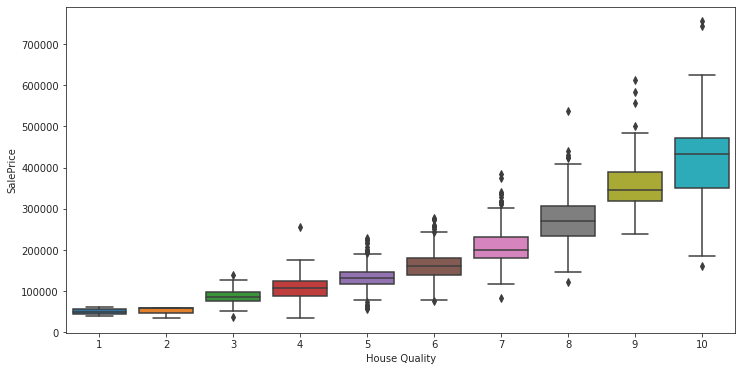

In [16]:
#TK box plot 
sns.set_style('white')
sns.set_style('ticks')
plt.figure(figsize=(12,6))
g = sns.boxplot(x='OverallQual', y='SalePrice', data=all_train_data)
g.set(xlabel='House Quality', ylabel='SalePrice')



*   Sale price is goes up when the house quality is better




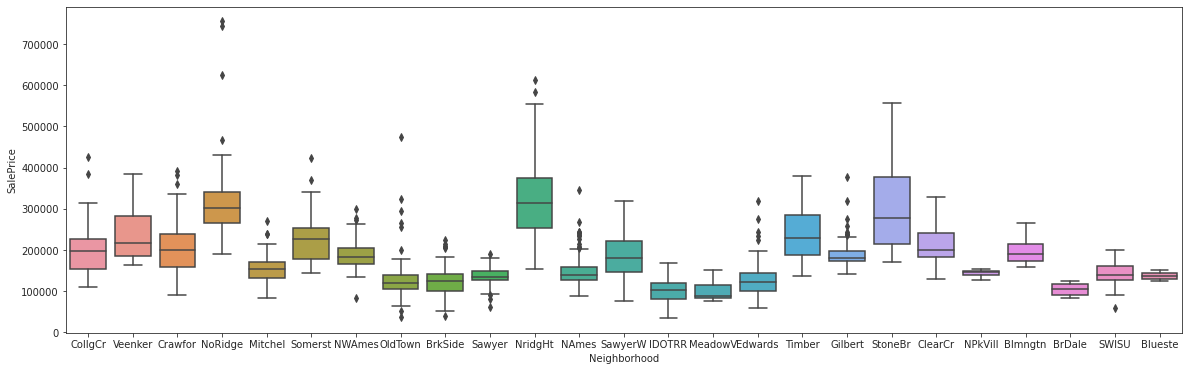

In [17]:
#TK box plot 
plt.figure(figsize=(20,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=raw_train_data)  #why am i getting error for all_train_data ? ValueError: Could not interpret input 'Neighborhood'

*   Neighborhoods with lowest price ranges are Mitchell, Brookside, Sawyer, Iowa DOT and Rail Road, Meadow Village, and Briardale
*   Neighborhoods :College Creek, Veenker, Crawford, Somerset, Northwest Ames, Sawyer West, Timberland, Clear Creek, Bloomington Heights have house price between $100,000 - $350,000 USD (excluding the outliers)

*   Northridge, Northridge Heights, Stone Brook have houses priced > $500K


## Modeling
(e.g. feature selection, normalization, training, scoring

In [18]:
# Convert categorical variable into dummy/indicator variables

all_train_data = pd.get_dummies(all_train_data)

# fill NaN with zeros

all_train_data = all_train_data.fillna(0)

all_train_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
529,530,20,0.0,32668,6,3,1957,1975,0.0,1219,...,0,0,0,1,0,0,1,0,0,0
491,492,50,79.0,9490,6,7,1941,1950,0.0,403,...,0,0,0,1,0,0,0,0,1,0
459,460,50,0.0,7015,5,4,1950,1950,161.0,185,...,0,0,0,1,0,0,0,0,1,0
279,280,60,83.0,10005,7,5,1977,1977,299.0,392,...,0,0,0,1,0,0,0,0,1,0
655,656,160,21.0,1680,6,5,1971,1971,381.0,0,...,0,0,0,1,0,0,0,1,0,0


In [19]:
# Split train data into train and dev datasets

train_data = all_train_data[:1000].drop(columns=['Id'])
dev_data = all_train_data[1000:].drop(columns=['Id'])

# extract labels
train_label = train_data.pop('SalePrice')
dev_label = dev_data.pop('SalePrice')

print (len(train_data), len(dev_data))

1000 460


### **Baseline Model!**

In [52]:
model = LinearRegression()
model.fit(train_data, train_label)
print('Baseline accuracy: ', model.score(dev_data, dev_label))



Baseline accuracy:  0.8712963843042248


In [51]:
# TODO treat outliears and missing values before training
# TODO normalize target variable SalePrice

model_rf=RandomForestClassifier(n_estimators=train_data.shape[1])
model_rf.fit(train_data, train_label)
importances=model_rf.feature_importances_

In [22]:
train_data1=pd.DataFrame({"features":pd.DataFrame(train_data).columns, "Importances":importances})


In [23]:
train_data1[train_data1.Importances > 0.01].sort_values("Importances", ascending=False).reset_index()

,index,features,Importances
0,2,LotArea,0.027573
1,15,GrLivArea,0.027535
2,12,1stFlrSF,0.027137
3,10,BsmtUnfSF,0.026125
4,11,TotalBsmtSF,0.025520
5,26,GarageArea,0.025327
6,5,YearBuilt,0.023133
7,34,MoSold,0.022604
8,1,LotFrontage,0.022585
9,24,GarageYrBlt,0.022311
